
 
 # **EXPLORATORY DATA ANALYSIS**#

In [ ]:
# Importing required libraries

from math import sqrt
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure
matplotlib.rcParams['figure.figsize'] = [12,4]

In [ ]:
# Loading the data

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
# loading data

data=pd.read_csv("/content/drive/MyDrive/USMELEC/usmelec.csv")

In [ ]:
data

,year,month,value
0,1973,1,160.218
1,1973,2,143.539
2,1973,3,148.158
3,1973,4,139.589
4,1973,5,147.395
...,...,...,...
481,2013,2,309.601
482,2013,3,325.372
483,2013,4,298.261
484,2013,5,322.118


**Data Visulization** 

In [ ]:
# Data and data size

print("Data:\n",data)
print("\nData size:",data.shape)

Data:
      year  month    value
0    1973      1  160.218
1    1973      2  143.539
2    1973      3  148.158
3    1973      4  139.589
4    1973      5  147.395
..    ...    ...      ...
481  2013      2  309.601
482  2013      3  325.372
483  2013      4  298.261
484  2013      5  322.118
485  2013      6  356.400

[486 rows x 3 columns]

Data size: (486, 3)


Text(0.5, 1.0, 'Electric Generation')

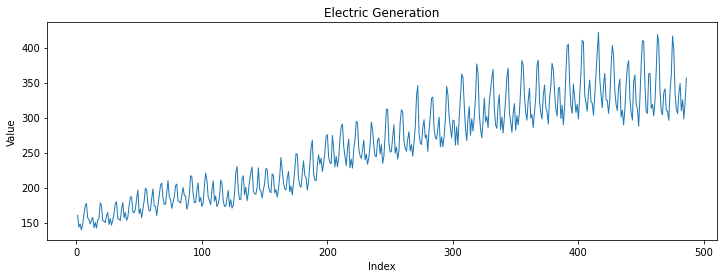

In [ ]:
# Plotting electric generation data

plt.plot(np.arange(1, data.shape[0]+1),data["value"],linewidth=1)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Electric Generation')


Text(0.5, 1.0, 'Yearly Electric Generation between 1973-2012')

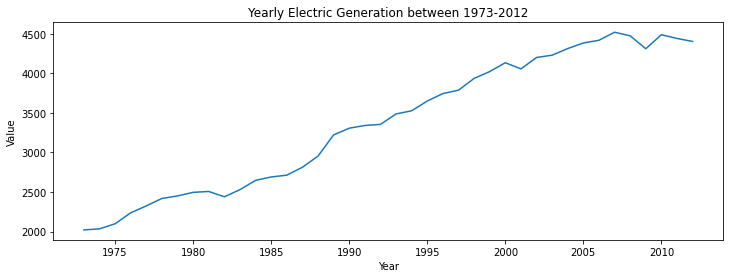

In [ ]:
# Plotting yearly electric generation data

per_year=[]
for i in range(0,480,12):
    summed= sum(data["value"][i:i+13])
    per_year+=[summed]

plt.plot(np.arange(1973, 2013),per_year)
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Yearly Electric Generation between 1973-2012')


Text(0.5, 1.0, 'Monthly Electric Generation between 1973-2012')

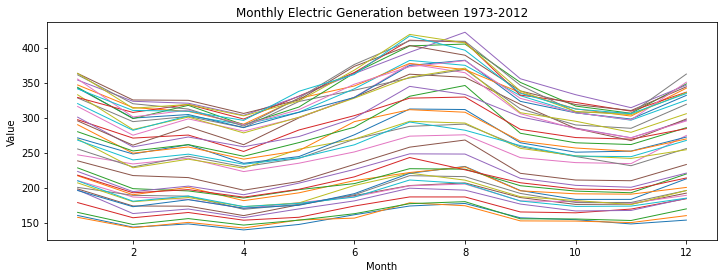

In [ ]:
# Plotting monthly electric generation data

for i in range(0,480,12):
    plt.plot(np.arange(1,13),data["value"][i:i+12],linewidth=1)

plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Monthly Electric Generation between 1973-2012')

**Pre-processing of Data**

In [ ]:
# Removing missing values

data = data[~np.isnan(data)]

In [ ]:
# Arranging input and ouput sets

target=data["value"]
month=data["month"]
year= data["year"]

inp=pd.concat([year,month],axis=1)

print("Input:\n\n",inp)
print("\n\nOutput:\n\n",target)

Input:

      year  month
0    1973      1
1    1973      2
2    1973      3
3    1973      4
4    1973      5
..    ...    ...
481  2013      2
482  2013      3
483  2013      4
484  2013      5
485  2013      6

[486 rows x 2 columns]


Output:

 0      160.218
1      143.539
2      148.158
3      139.589
4      147.395
        ...   
481    309.601
482    325.372
483    298.261
484    322.118
485    356.400
Name: value, Length: 486, dtype: float64


In [ ]:
# Splitting data to train and test sets
test_x= inp[450:486]
train_x= inp[0:450]

test_y= target[450:486]
train_y= target[0:450]

**Data Analysis**

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf

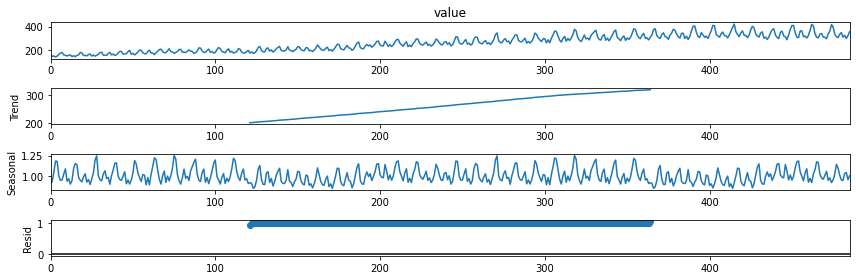

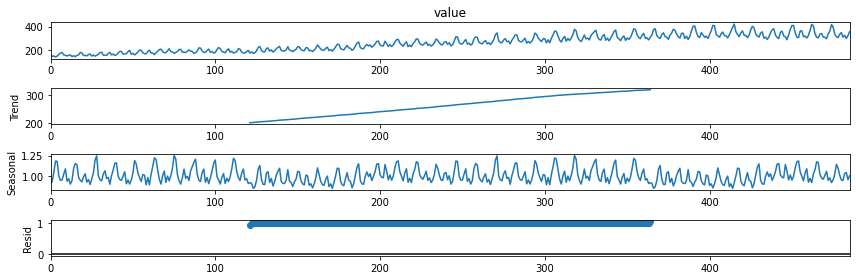

In [ ]:
# Checking seasonality of data

from statsmodels.tsa.seasonal import seasonal_decompose
nresult = seasonal_decompose(data["value"], model='multiplicable',period=243)
nresult.plot()

In [ ]:
# Checking stationary

result = adfuller(target, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -1.4125698510678033
p-value: 0.5762353593662204
Critial Values:
   1%, -3.4444002781824477
Critial Values:
   5%, -2.867735576537528
Critial Values:
   10%, -2.57007000456571


Since the p-value=0.576 is not less than 0.05, time series is non-stationary.

In [ ]:
# Converting non-stationary data to stationary with differencing

differenced= target
differenced=differenced.diff(2)

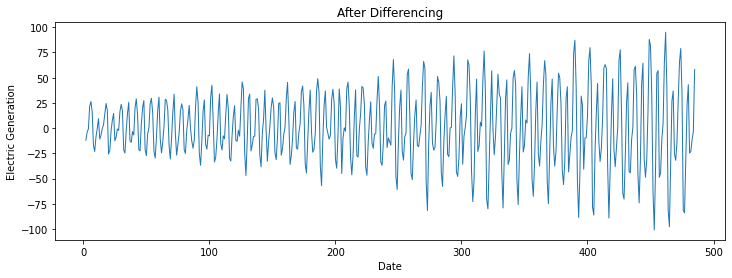

In [ ]:
plt.plot(differenced[1:],linewidth=1)
plt.xlabel('Date')
plt.ylabel('Electric Generation')
plt.title('After Differencing')
plt.show()

In [ ]:
# Checking stationary

result = adfuller(differenced[2:], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -5.712913417132887
p-value: 7.230230678720133e-07
Critial Values:
   1%, -3.4444002781824477
Critial Values:
   5%, -2.867735576537528
Critial Values:
   10%, -2.57007000456571


Since the p-value=7.23e-07 is less than 0.05, time series is stationary.

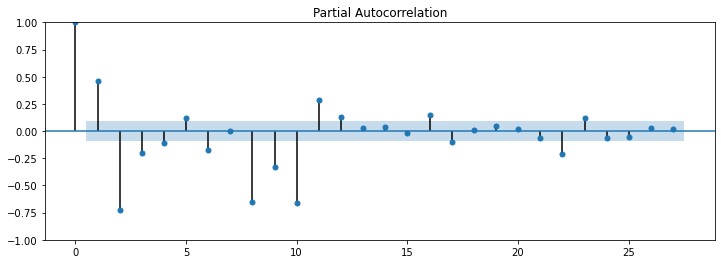

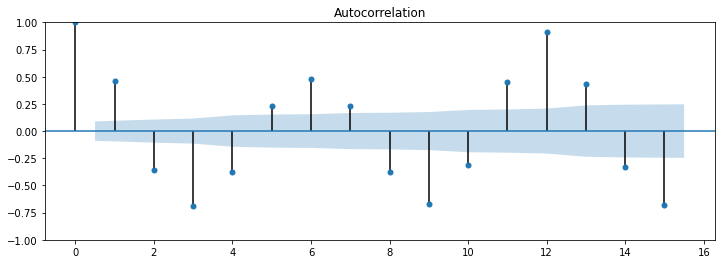

In [ ]:
#  Plotting autocorrelation graphs

import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(differenced.dropna().squeeze(),method="ywm")
plt.show()
sm.graphics.tsa.plot_acf(differenced.dropna().squeeze(),lags=15)
plt.show()

# **MODELLING**#

In [ ]:
# Importing cross validation score and grid search 

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### 1. Linear Regression#

In [ ]:
# Importing required libraries for linear regression model
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score



In [ ]:
# Modelling and predicting with linear regression
regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)
y_pred = regr.predict(inp)

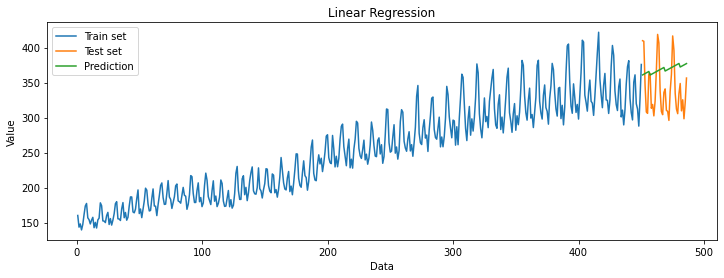

In [ ]:
# Plotting prediction results
plt.plot(np.arange(1, 451),train_y,label='Train set')
plt.plot(np.arange(451,487),test_y,label='Test set')
plt.plot(np.arange(451,487), y_pred[450:],label='Prediction')
plt.legend()
plt.xlabel('Data')
plt.ylabel('Value')
plt.title('Linear Regression')
plt.legend()

In [ ]:
print("Mean squared error: %.2f" %mean_squared_error(test_y,y_pred[450:]))
rmse=sqrt(mean_squared_error(test_y,y_pred[450:]))
print("Root mean squared error: %.2f\n" %rmse)
print("Test Score:",r2_score(test_y,y_pred[450:]))
print("Train Score:",r2_score(train_y,y_pred[:450]))

Mean squared error: 2245.20
Root mean squared error: 47.38

Test Score: -0.6770207660809644
Train Score: 0.8649267932721912


### 2. Support Vector Regression#

In [ ]:
# Importing required libraries for support vector regression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Modelling and predicting with support vector regression
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.17)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(train_x, train_y).predict(inp)
y_lin = svr_lin.fit(train_x, train_y).predict(inp)
y_poly = svr_poly.fit(train_x, train_y).predict(inp)


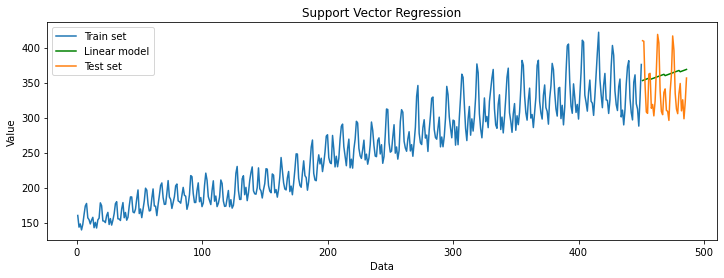

In [ ]:
# Plotting prediction results

# Linear model

plt.plot(np.arange(1,451),train_y,label="Train set")
plt.plot(np.arange(451,487), y_lin[450:], color='g', label='Linear model')
plt.plot(np.arange(451,487),test_y,label="Test set")
plt.xlabel('Data')
plt.ylabel('Value')
plt.title('Support Vector Regression')
plt.legend()

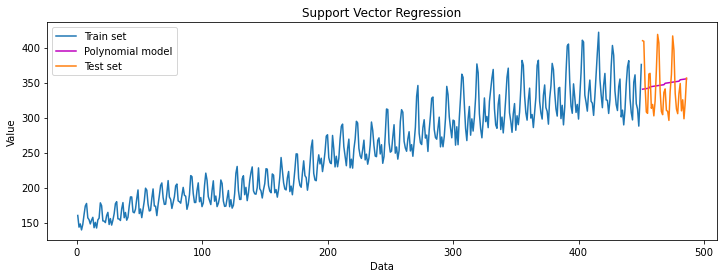

In [ ]:
# Polynomial model

plt.plot(np.arange(1,451),train_y,label="Train set")
plt.plot(np.arange(451,487), y_poly[450:], color='m', label='Polynomial model')
plt.plot(np.arange(451,487),test_y,label="Test set")
plt.xlabel('Data')
plt.ylabel('Value')
plt.title('Support Vector Regression')
plt.legend()

Text(0, 0.5, 'Value')

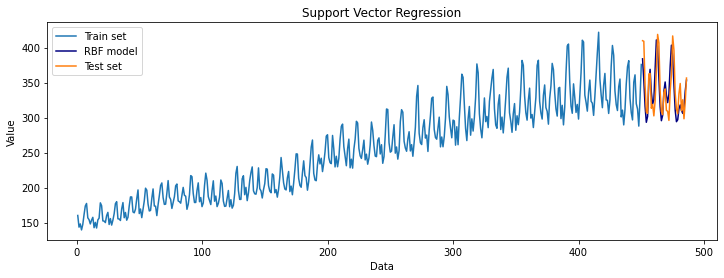

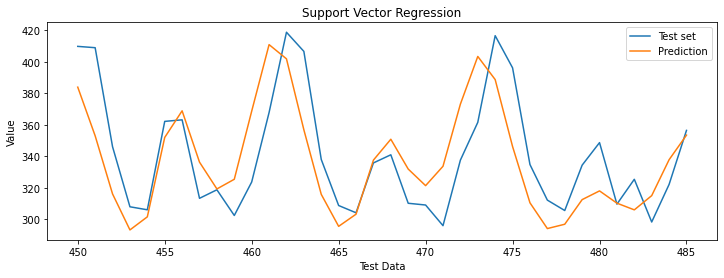

In [ ]:
# RBF(Radial basis function) model

plt.figure(1)
plt.plot(np.arange(1,451),train_y,label="Train set")
plt.plot(np.arange(451,487), y_rbf[450:], color='navy', label='RBF model')
plt.plot(np.arange(451,487),test_y,label="Test set")
plt.xlabel('Data')
plt.ylabel('Value')
plt.title('Support Vector Regression')
plt.legend()

plt.figure(2)
plt.plot(np.arange(450,486),test_y,label="Test set")
plt.plot(np.arange(450,486),y_rbf[450:],label="Prediction")
plt.title('Support Vector Regression')
plt.legend()
plt.xlabel('Test Data')
plt.ylabel('Value')

In [ ]:
print("Mean squared error: %.2f" % mean_squared_error(test_y,y_rbf[450:]))
rmse=sqrt(mean_squared_error(test_y,y_rbf[450:]))
print("Root mean squared error: %.2f\n" %rmse)
print("Test score of rbf model:",r2_score(test_y,y_rbf[450:]))
print("Train score of rbf model:",r2_score(train_y,y_rbf[:450]))

Mean squared error: 699.30
Root mean squared error: 26.44

Test score of rbf model: 0.47766707599932645
Train score of rbf model: 0.9921985258666752


### 3. Random Forest#

**Cross Validation**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()

In [ ]:
accuracies_rf=cross_val_score(regressor,train_x,train_y,cv=10)
print("Accuracy: %",accuracies_rf.mean()*100)
print("Standard deviation: %",accuracies_rf.std()*100)

Accuracy: % 43.08601116751207
Standard deviation: % 64.77533552402775


**Grid Search**

In [ ]:
parameter = {
    'n_estimators': [100,1000,10],
    'min_samples_leaf': [2,5,10],
    'min_samples_split':[2,8,5],
    "max_depth":[4,6,20]
}

In [ ]:
grid_rf=GridSearchCV(estimator=regressor, param_grid = parameter, cv =5, n_jobs=-1)
grid_rf.fit(train_x,train_y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 20],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 8, 5],
                         'n_estimators': [100, 1000, 10]})

In [ ]:
print(grid_rf.best_params_)

{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 1000}


**Model Implementing**

In [ ]:
# Importing required libraries

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Modelling and predicting 

regressor = RandomForestRegressor(n_estimators = 10,random_state=1,max_depth=20,min_samples_leaf=2,min_samples_split=2)
regressor.fit(train_x, train_y)
pred= regressor.predict(inp)

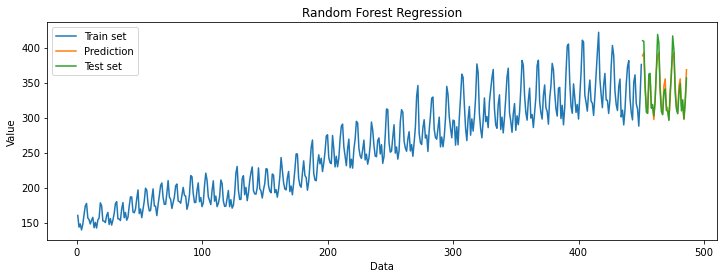

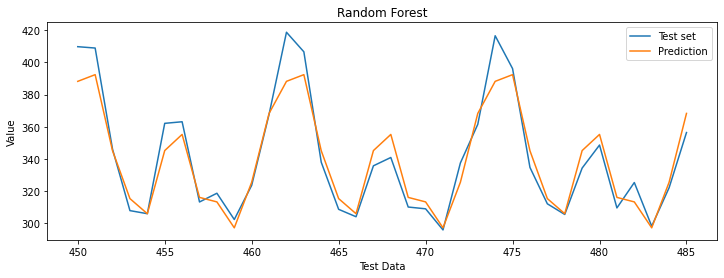

In [ ]:
# Plotting prediction results

plt.figure(1)
plt.plot(np.arange(1,451),train_y,label="Train set")
plt.plot(np.arange(451,487), pred[450:],label="Prediction")
plt.plot(np.arange(451,487),test_y,label="Test set")
plt.xlabel('Data')
plt.ylabel('Value')
plt.title('Random Forest Regression')
plt.legend()

plt.figure(2)
plt.plot(np.arange(450,486),target[450:],label="Test set")
plt.plot(np.arange(450,486),pred[450:],label="Prediction")
plt.title('Random Forest')
plt.xlabel('Test Data')
plt.ylabel('Value')
plt.legend()

In [ ]:
print("Mean squared error: %.2f" % mean_squared_error(test_y,pred[450:]))
rmse=sqrt(mean_squared_error(test_y,pred[450:]))
print("Root mean squared error: %.2f\n" %rmse)
print("Test score of random forest model:",r2_score(test_y,pred[450:]))
print("Train score of random forest model:",r2_score(train_y,pred[:450]))

Mean squared error: 122.65
Root mean squared error: 11.07

Test score of random forest model: 0.908385220700236
Train score of random forest model: 0.991881535205486


### 4. LightGBM#

**Cross Validation**

In [ ]:
import lightgbm as lgb
regressor=lgb.LGBMRegressor()

In [ ]:
accuracies_gbm=cross_val_score(regressor,train_x,train_y,cv=10)
print("Accuracy: %",accuracies_gbm.mean()*100)
print("Standard deviation: %",accuracies_gbm.std()*100)

Accuracy: % 34.70576894403612
Standard deviation: % 102.49065132611943


**Grid Search**

In [ ]:
params = {
    'n_estimators': [500,1000,2000],
    'max_depth': [4,15,25,100],
    'num_leaves': [5,16,42,21],
    'learning_rate': [0.2,0.5,0.03,0.7],
}

In [ ]:
grid_lgb=GridSearchCV(estimator=regressor, param_grid = params, cv =5, n_jobs=-1)
grid_lgb.fit(train_x,train_y)

GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.5, 0.03, 0.7],
                         'max_depth': [4, 15, 25, 100],
                         'n_estimators': [500, 1000, 2000],
                         'num_leaves': [5, 16, 42, 21]})

In [ ]:
print(grid_lgb.best_params_)

{'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 500, 'num_leaves': 16}


**Model Implementing**

In [ ]:
# Importing required library for lightGBM

import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Modelling and predicting with LightGBM regression

params = {
    'n_estimators': 500,
    'max_depth': 4,
    'num_leaves': 16,
    'learning_rate': 0.5,
    'boosting_type': 'dart'
}

model = lgb.LGBMRegressor(first_metric_only = True, **params)

model.fit(train_x, train_y,
          eval_metric = 'l1', 
          eval_set = [(test_x, test_y)],
          #early_stopping_rounds = 10,
          )

forecast = model.predict(inp)

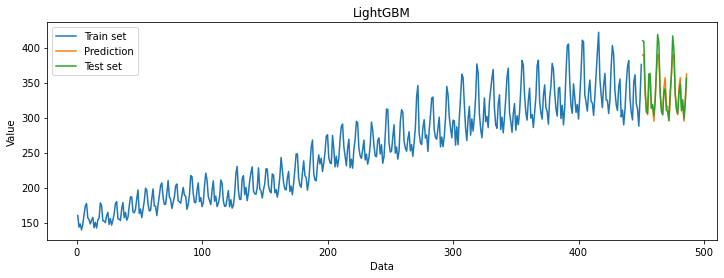

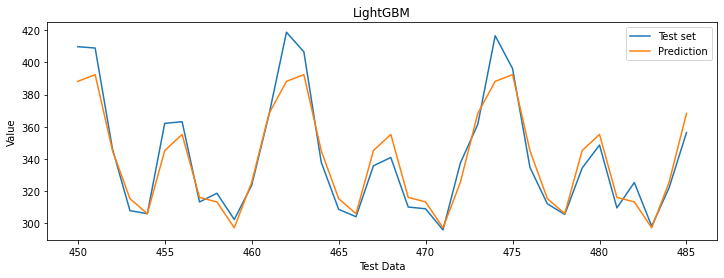

In [ ]:
# Plotting prediction results 

plt.figure(1)
plt.plot(np.arange(1,451),train_y,label="Train set")
plt.plot(np.arange(451,487), forecast[450:],label="Prediction")
plt.plot(np.arange(451,487),test_y,label="Test set")
plt.xlabel('Data')
plt.ylabel('Value')
plt.title('LightGBM')
plt.legend()

plt.figure(2)
plt.plot(np.arange(450,486),target[450:],label="Test set")
plt.plot(np.arange(450,486),pred[450:],label="Prediction")
plt.title('LightGBM')
plt.xlabel('Test Data')
plt.ylabel('Value')
plt.legend()

In [ ]:
print("Mean squared error: %.2f" % mean_squared_error(test_y,forecast[450:]))
rmse=sqrt(mean_squared_error(test_y,forecast[450:]))
print("Root mean squared error: %.2f\n" %rmse)
print("Test Score:",r2_score(test_y,forecast[450:]))
print("Train Score:",r2_score(train_y,forecast[:450]))

Mean squared error: 120.27
Root mean squared error: 10.97

Test Score: 0.910168135736934
Train Score: 0.9956061994991044


### 5. ARIMA#

In [ ]:
# Importing required libraries for ARIMA

from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Modelling and predicting with ARIMA

model = auto_arima(train_y, seasonal=True, m=12)
forecasts = model.predict(36)

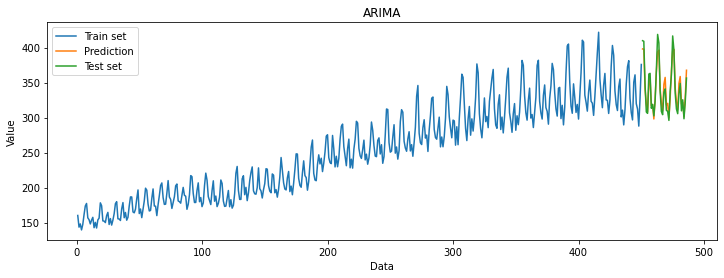

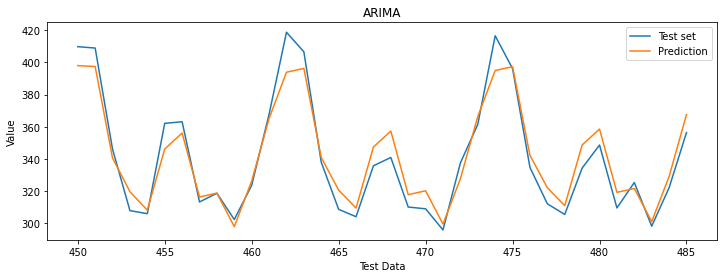

In [ ]:
# Plotting prediction results

plt.figure(1)
plt.plot(np.arange(1,451),train_y,label="Train set")
plt.plot(np.arange(451,487), forecasts,label="Prediction")
plt.plot(np.arange(451,487),test_y,label="Test set")
plt.xlabel('Data')
plt.ylabel('Value')
plt.title('ARIMA')
plt.legend()

plt.figure(2)
plt.plot(np.arange(450,486),test_y,label="Test set")
plt.plot(np.arange(450,486),forecasts,label="Prediction")
plt.title('ARIMA')
plt.xlabel('Test Data')
plt.ylabel('Value')
plt.legend()

In [ ]:
print("Mean squared error: %.2f" % mean_squared_error(test_y,forecasts))
rmse=sqrt(mean_squared_error(test_y,forecasts))
print("Root mean squared error: %.2f\n" %rmse)
print("Test Score:",r2_score(test_y,forecasts))


Mean squared error: 101.64
Root mean squared error: 10.08

Test Score: 0.9240803014709345


# **FEATURE ENGINEERING**#

### LightGBM with Lagging#


In [ ]:
data=pd.read_csv("usmelec.csv")

In [ ]:
#lagging

data['lag_1'] = data['value'].shift(1)

inp_lagged=pd.concat([data["year"],data["month"],data['lag_1']],axis=1)

print(data)

     year  month    value    lag_1
0    1973      1  160.218      NaN
1    1973      2  143.539  160.218
2    1973      3  148.158  143.539
3    1973      4  139.589  148.158
4    1973      5  147.395  139.589
..    ...    ...      ...      ...
481  2013      2  309.601  348.642
482  2013      3  325.372  309.601
483  2013      4  298.261  325.372
484  2013      5  322.118  298.261
485  2013      6  356.400  322.118

[486 rows x 4 columns]


In [ ]:
# Splitting lagged data into train and test datasets

test_x_lag= inp_lagged[450:487]
train_x_lag= inp_lagged[1:450]

test_y_lag= target[450:487]
train_y_lag= target[1:450]

In [ ]:
# Implementing model

params_lag = {
    'n_estimators': 5000,
    'max_depth': 4,
    'num_leaves': 4,
    'learning_rate': 0.01,
    'boosting_type': 'gbdt'
}

model_lag = lgb.LGBMRegressor(first_metric_only = True, **params_lag)

model_lag.fit(train_x_lag, train_y_lag,
        eval_metric = 'l1', 
        eval_set = [(test_x_lag, test_y_lag)],
          )
forecast_lag = model_lag.predict(inp_lagged)


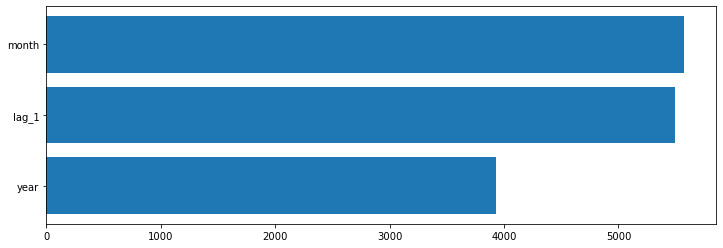

In [ ]:
# Feature importance

importances = model_lag.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(train_x_lag.columns)[indices])

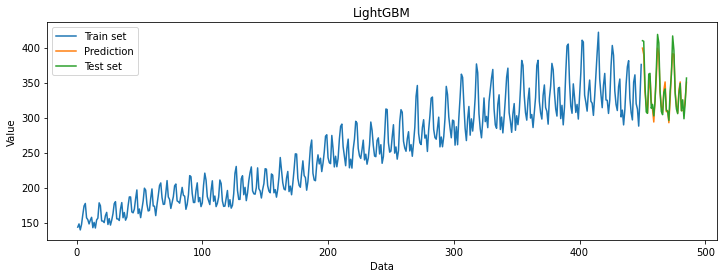

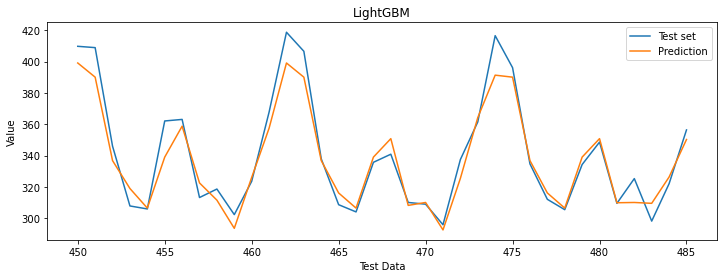

In [ ]:
#Plotting prediction results 

plt.figure(1)
plt.plot(np.arange(1,450),train_y_lag,label="Train set")
plt.plot(np.arange(450,486), forecast_lag[450:],label="Prediction")
plt.plot(np.arange(450,486),test_y_lag,label="Test set")
plt.xlabel('Data')
plt.ylabel('Value')
plt.title('LightGBM')
plt.legend()

plt.figure(2)
plt.plot(np.arange(450,486),target[450:],label="Test set")
plt.plot(np.arange(450,486),forecast_lag[450:],label="Prediction")
plt.title('LightGBM')
plt.xlabel('Test Data')
plt.ylabel('Value')
plt.legend()

In [ ]:
print("Mean squared error: %.2f" % mean_squared_error(test_y_lag,forecast_lag[450:]))
rmse=sqrt(mean_squared_error(test_y_lag,forecast_lag[450:]))
print("Root mean squared error: %.2f\n" %rmse)
print("Test Score:",r2_score(test_y_lag,forecast_lag[450:]))
print("Train Score:",r2_score(train_y_lag,forecast_lag[1:450]))

Mean squared error: 102.34
Root mean squared error: 10.12

Test Score: 0.9235573859935331
Train Score: 0.9938428607993465


### LightGBM with Rolling#

In [ ]:
data=pd.read_csv("usmelec.csv")

In [ ]:
#Rolling features

data['Rolling Average'] = data['value'].rolling(2).mean().shift(1)
data['Rolling Std'] = data['value'].rolling(5).std().shift(1)
data['Min'] = data['value'].rolling(3).min().shift(1)
data['Max'] = data['value'].rolling(6).max().shift(1)

inp_rolled=pd.concat([data["month"],data['Rolling Average'],data['Rolling Std'],data["Max"]],axis=1)

print(data)

     year  month    value  Rolling Average  Rolling Std      Min      Max
0    1973      1  160.218              NaN          NaN      NaN      NaN
1    1973      2  143.539              NaN          NaN      NaN      NaN
2    1973      3  148.158         151.8785          NaN      NaN      NaN
3    1973      4  139.589         145.8485          NaN  143.539      NaN
4    1973      5  147.395         143.8735          NaN  139.589      NaN
..    ...    ...      ...              ...          ...      ...      ...
481  2013      2  309.601         341.4885    17.765675  305.548  396.108
482  2013      3  325.372         329.1215    18.595836  309.601  348.642
483  2013      4  298.261         317.4865    17.757274  309.601  348.642
484  2013      5  322.118         311.8165    19.892705  298.261  348.642
485  2013      6  356.400         310.1895    18.915876  298.261  348.642

[486 rows x 7 columns]


In [ ]:
# Splitting data into train and test datasets

test_x_roll= inp_rolled[450:487]
train_x_roll= inp_rolled[5:450]

test_y_roll= target[450:487]
train_y_roll= target[5:450]


In [ ]:
# Implementing model

params_roll = {
    'n_estimators': 2000,
    'max_depth': 4,
    'num_leaves': 8,
    'learning_rate': 0.2,
    'boosting_type': 'dart'
}

model_roll = lgb.LGBMRegressor(first_metric_only = True, **params_roll)

model_roll.fit(train_x_roll, train_y_roll,
          eval_metric = 'l1', 
          eval_set = [(test_x_roll, test_y_roll)],
          )
forecast_roll = model_roll.predict(inp_rolled)
forecast_roll

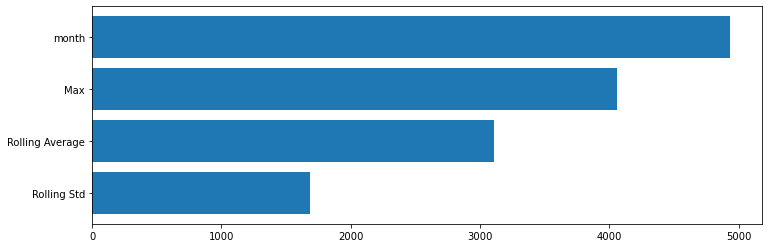

In [ ]:
# Feature importance

importances = model_roll.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(train_x_roll.columns)[indices])

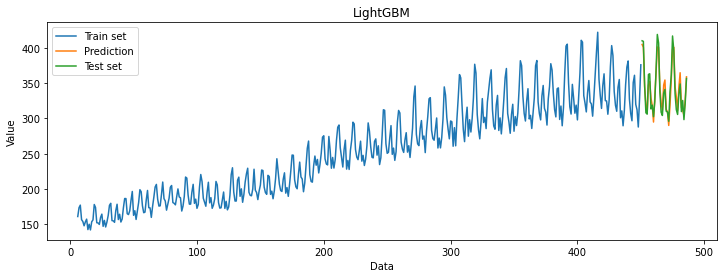

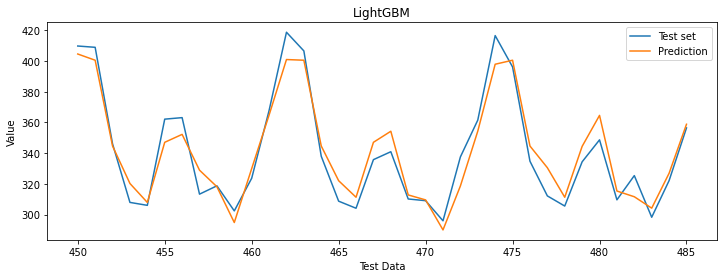

In [ ]:
#Plotting prediction results

plt.figure(1)
plt.plot(np.arange(6,451),train_y_roll,label="Train set")
plt.plot(np.arange(451,487), forecast_roll[450:],label="Prediction")
plt.plot(np.arange(451,487),test_y_roll,label="Test set")
plt.xlabel('Data')
plt.ylabel('Value')
plt.title('LightGBM')
plt.legend()

plt.figure(2)
plt.plot(np.arange(450,486),test_y_roll,label="Test set")
plt.plot(np.arange(450,486),forecast_roll[450:],label="Prediction")
plt.title('LightGBM')
plt.xlabel('Test Data')
plt.ylabel('Value')
plt.legend()

In [ ]:
print("Mean squared error: %.2f" % mean_squared_error(test_y_roll,forecast_roll[450:]))
rmse=sqrt(mean_squared_error(test_y_roll,forecast_roll[450:]))
print("Root mean squared error: %.2f\n" %rmse)
print("Test Score:",r2_score(test_y_roll,forecast_roll[450:]))
print("Train Score:",r2_score(train_y_roll,forecast_roll[5:450]))


Mean squared error: 105.79
Root mean squared error: 10.29

Test Score: 0.9209821167787137
Train Score: 0.997703687186199


### LightGBM with Encoding#

In [ ]:
data=pd.read_csv("usmelec.csv")

In [ ]:
# Encoding seasons 

month=data["month"]
encoded=month.copy()

for i in np.arange(0,486):
    if encoded[i] in (11,1,2):
            encoded[i]=3
    elif encoded[i] in (3,4,5):
            encoded[i]=1
    elif encoded[i] in (6,7,8):
            encoded[i]=4
    elif encoded[i] in (9,10,11):
            encoded[i]=2
            
data["Encoded"]=encoded

inp_encoded=pd.concat([data["year"],data["month"],data["Encoded"]],axis=1)
inp_encoded

,year,month,Encoded
0,1973,1,3
1,1973,2,3
2,1973,3,1
3,1973,4,1
4,1973,5,1
...,...,...,...
481,2013,2,3
482,2013,3,1
483,2013,4,1
484,2013,5,1


In [ ]:
# Splitting data into train and test datasets

test_x_en= inp_encoded[450:487]
train_x_en= inp_encoded[0:450]

test_y_en= target[450:487]
train_y_en= target[0:450]


In [ ]:
# Implementing model

params_en = {
    'n_estimators': 500,
    'max_depth': 4,
    'num_leaves': 4,
    'learning_rate': 0.8,
    'boosting_type': 'dart'
}

model_en= lgb.LGBMRegressor(first_metric_only = True, **params_en)

model_en.fit(train_x_en, train_y_en,
          eval_metric = 'l1', 
          eval_set = [(test_x_en, test_y_en)],
          )
forecast_en = model_en.predict(inp_encoded)


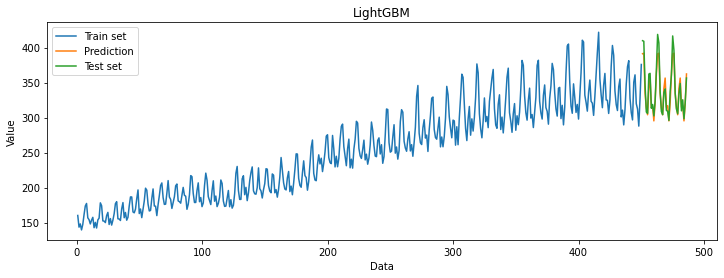

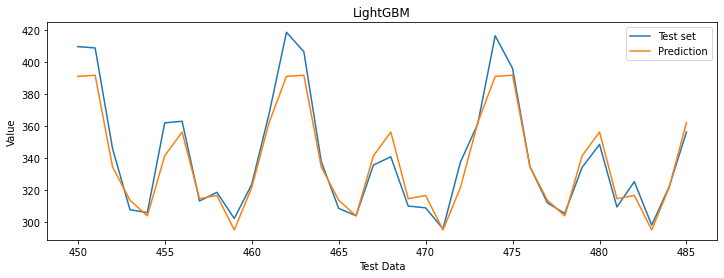

In [ ]:
#Plotting prediction results

plt.figure(1)
plt.plot(np.arange(1,451),train_y_en,label="Train set")
plt.plot(np.arange(451,487), forecast_en[450:],label="Prediction")
plt.plot(np.arange(451,487),test_y_en,label="Test set")
plt.title('LightGBM')
plt.xlabel('Data')
plt.ylabel('Value')
plt.legend()

plt.figure(2)
plt.plot(np.arange(450,486),test_y_en,label="Test set")
plt.plot(np.arange(450,486),forecast_en[450:],label="Prediction")
plt.title('LightGBM')
plt.xlabel('Test Data')
plt.ylabel('Value')
plt.legend()

In [ ]:
print("Mean squared error: %.2f" % mean_squared_error(test_y_en,forecast_en[450:]))
rmse=sqrt(mean_squared_error(test_y_en,forecast_en[450:]))
print("Root mean squared error: %.2f\n" %rmse)
print("Test Score:",r2_score(test_y_en,forecast_en[450:]))
print("Train Score:",r2_score(train_y_en,forecast_en[:450]))


Mean squared error: 108.55
Root mean squared error: 10.42

Test Score: 0.9189227804426257
Train Score: 0.9942170006715038


### LightGBM with all features#

In [ ]:
data=pd.read_csv("usmelec.csv")

In [ ]:
# Adding features 

data['lag_1'] = data['value'].shift(1)
data['Rolling Std'] = data['value'].rolling(5).std().shift(1)
data['Min'] = data['value'].rolling(3).min().shift(1)
data['Max'] = data['value'].rolling(6).max().shift(1)
data['Rolling Average'] = data['value'].rolling(2).mean().shift(1)
data["Encoded"]=encoded

inp_lgb=pd.concat([data["year"],data["month"],data['lag_1'],data["Rolling Average"],data['Rolling Std'],data['Max'],data['Min'],data["Encoded"]],axis=1)

print("\n Features:\n \n",inp_lgb)



 Features:
 
      year  month    lag_1  Rolling Average  Rolling Std      Max      Min  \
0    1973      1      NaN              NaN          NaN      NaN      NaN   
1    1973      2  160.218              NaN          NaN      NaN      NaN   
2    1973      3  143.539         151.8785          NaN      NaN      NaN   
3    1973      4  148.158         145.8485          NaN      NaN  143.539   
4    1973      5  139.589         143.8735          NaN      NaN  139.589   
..    ...    ...      ...              ...          ...      ...      ...   
481  2013      2  348.642         341.4885    17.765675  396.108  305.548   
482  2013      3  309.601         329.1215    18.595836  348.642  309.601   
483  2013      4  325.372         317.4865    17.757274  348.642  309.601   
484  2013      5  298.261         311.8165    19.892705  348.642  298.261   
485  2013      6  322.118         310.1895    18.915876  348.642  298.261   

     Encoded  
0          3  
1          3  
2          1  


In [ ]:
# Splitting data into train and test datasets

test_x_lgb= inp_lgb[450:487]
train_x_lgb= inp_lgb[6:450]

test_y_lgb= target[450:487]
train_y_lgb= target[6:450]


In [ ]:
# Model Implementing

params_lgb = {
    'n_estimators': 1000, ##900
    'max_depth': 4,
    'num_leaves': 4,
    'learning_rate': 0.25,  ##0.25
    'boosting_type': 'dart'
}

model_lgb = lgb.LGBMRegressor(first_metric_only = True, **params_lgb)

model_lgb.fit(train_x_lgb, train_y_lgb,
          eval_metric = 'l1', 
          eval_set = [(test_x_lgb, test_y_lgb)],
          )
forecast_lgb = model_lgb.predict(inp_lgb)


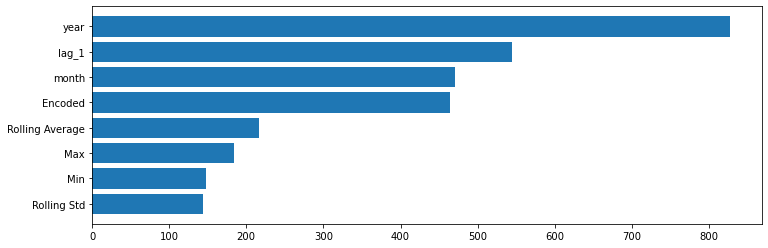

In [ ]:
# Feature Importance

importances = model_lgb.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(train_x_lgb.columns)[indices])

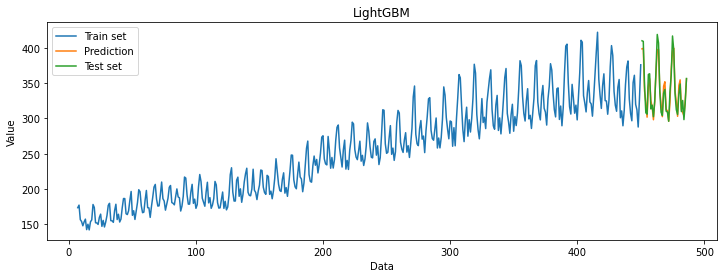

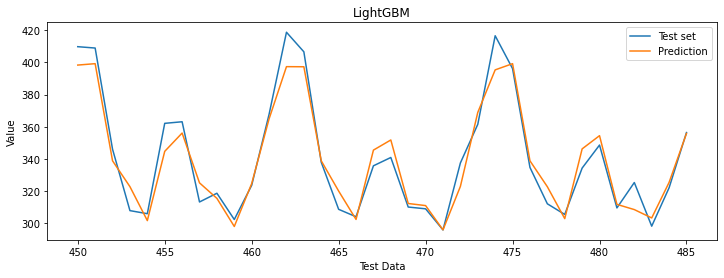

In [ ]:
# Plotting prediction results

plt.figure(1)
plt.plot(np.arange(7,451),train_y_lgb,label="Train set")
plt.plot(np.arange(451,487), forecast_lgb[450:],label="Prediction")
plt.plot(np.arange(451,487),test_y_lgb,label="Test set")
plt.title('LightGBM')
plt.xlabel('Data')
plt.ylabel('Value')
plt.legend()

plt.figure(2)
plt.plot(np.arange(450,486),test_y_lgb,label="Test set")
plt.plot(np.arange(450,486),forecast_lgb[450:],label="Prediction")
plt.title('LightGBM')
plt.xlabel('Test Data')
plt.ylabel('Value')
plt.legend()

In [ ]:
print("Mean squared error: %.2f" % mean_squared_error(test_y_lgb,forecast_lgb[450:]))
rmse=sqrt(mean_squared_error(test_y_lgb,forecast_lgb[450:]))
print("Root mean squared error: %.2f\n" %rmse)
print("Test Score:",r2_score(test_y_lgb,forecast_lgb[450:]))
print("Train Score:",r2_score(train_y_lgb,forecast_lgb[6:450]))


Mean squared error: 91.86
Root mean squared error: 9.58

Test Score: 0.9313881147827449
Train Score: 0.99583044289895


### SARIMAX #

In [ ]:
#Importing required libraries

from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data=pd.read_csv("usmelec.csv")

In [ ]:
# Adding features to data

month=data["month"]
encoded=month.copy()

for i in np.arange(0,486):
    if encoded[i] in (11,1,2):
            encoded[i]=2
    elif encoded[i] in (3,4,5):
            encoded[i]=4
    elif encoded[i] in (6,7,8):
            encoded[i]=1
    elif encoded[i] in (9,10,11):
            encoded[i]=3
            
data["Encoded"]=encoded




data['lag_1'] = data['value'].shift(1)
data['Rolling Average'] = data['value'].rolling(7).mean().shift(1)
data['Rolling Std'] = data['value'].rolling(5).std().shift(1)
data['Min'] = data['value'].rolling(5).min().shift(1)
data['Max'] = data['value'].rolling(6).max().shift(1)
data["Encoded"]=encoded

exogenous_features = ["month","Max","Min","lag_1",'Rolling Average',"Rolling Std","Encoded"]

In [ ]:
# Splitting data into test and train sets

data_train=data[7:450]
data_test=data[450:]

In [ ]:
# Implementing model 

model = auto_arima(data_train['value'], exogenous=data_train[exogenous_features], trace=True, error_action="ignore",
                   suppress_warnings=True)

model.fit(data_train['value'], exogenous=data_train[exogenous_features])

forecast = model.predict(n_periods=len(data_test), exogenous=data_test[exogenous_features])

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3961.650, Time=1.54 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3964.356, Time=0.28 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3926.380, Time=1.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3913.226, Time=1.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3962.465, Time=0.87 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3918.459, Time=1.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=3823.719, Time=1.23 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=3859.043, Time=1.51 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=3831.805, Time=1.81 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=3802.039, Time=1.52 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=3758.361, Time=1.57 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=3647.736, Time=1.46 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=3659.002, Time=1.35 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=3686.492, Time=2.37 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept

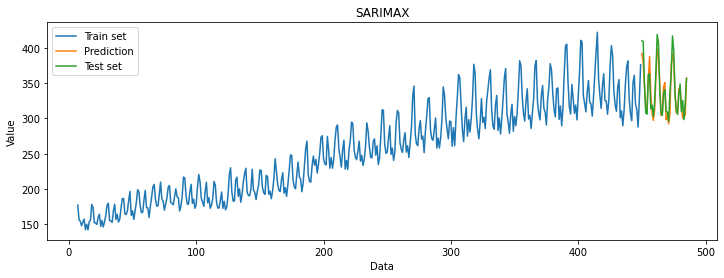

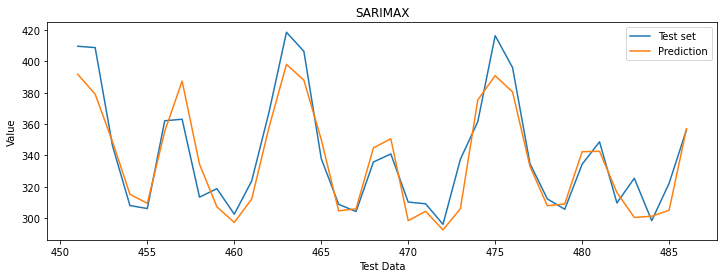

In [ ]:
# Plotting prediction results

plt.figure(1)
plt.plot(np.arange(7,450),data_train["value"],label="Train set")
plt.plot(np.arange(450,486), forecast,label="Prediction")
plt.plot(np.arange(450,486),data_test["value"],label="Test set")
plt.title('SARIMAX')
plt.xlabel('Data')
plt.ylabel('Value')
plt.legend()

plt.figure(2)
plt.plot(np.arange(451,487),data_test["value"],label="Test set")
plt.plot(np.arange(451,487),forecast,label="Prediction")
plt.title('SARIMAX')
plt.xlabel('Test Data')
plt.ylabel('Value')
plt.legend()

In [ ]:
print("Mean squared error: %.2f" % mean_squared_error(data_test["value"],forecast))
rmse=sqrt(mean_squared_error(data_test["value"],forecast))
print("Root mean squared error: %.2f\n" %rmse)
print("Test Score:",r2_score(data_test["value"],forecast))

Mean squared error: 200.87
Root mean squared error: 14.17

Test Score: 0.84996081448123


### XGBOOST#

In [ ]:
# Importing required library

import xgboost as xgb
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_csv("usmelec.csv")

In [ ]:
# Splitting data into input and target

X, y = data.iloc[:,:-1],data.iloc[:,-1]

In [ ]:
# Adding features 

X['lag_1'] = data['value'].shift(1)
X['Rolling Average'] = data['value'].rolling(2).mean().shift(1)
#X['Rolling Std'] = data['value'].rolling(5).std().shift(1)
X['Min'] = data['value'].rolling(5).min().shift(1)
X['Max'] = data['value'].rolling(6).max().shift(1)
X["Encoded"]=encoded

In [ ]:
# Splitting data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=36/486,shuffle=False)

In [ ]:
# Model implementing

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 4, reg_alpha = 10,reg_lambda = 0.3, n_estimators = 300)

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X)

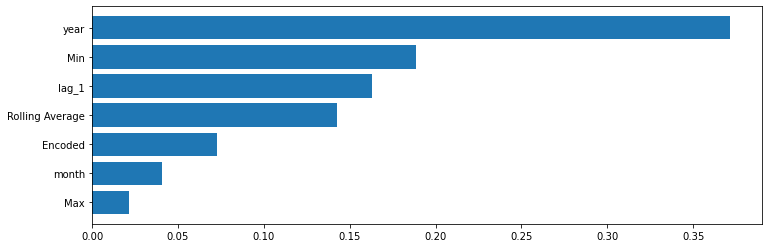

In [ ]:
# Feature importance

importances = xg_reg.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

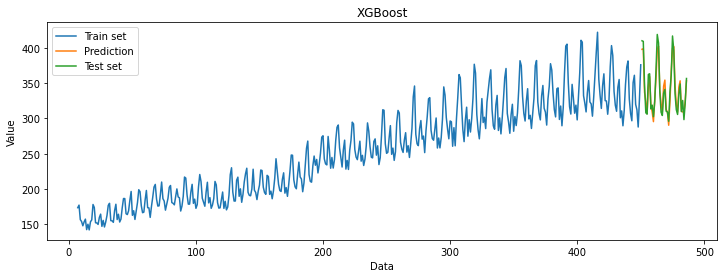

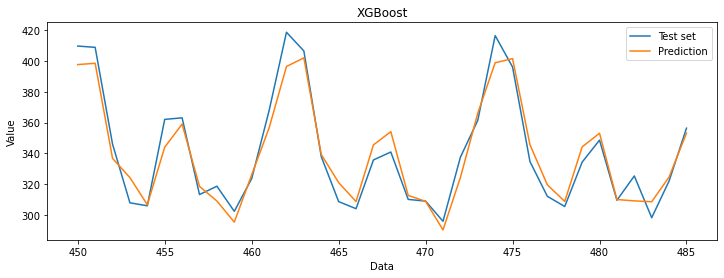

In [ ]:
# Plotting prediction results

plt.figure(1)
plt.plot(np.arange(7,451),train_y_lgb,label="Train set")
plt.plot(np.arange(451,487), preds[450:],label="Prediction")
plt.plot(np.arange(451,487),test_y_lgb,label="Test set")
plt.title('XGBoost')
plt.xlabel('Data')
plt.ylabel('Value')
plt.legend()

plt.figure(2)
plt.plot(np.arange(450,486),test_y_lgb,label="Test set")
plt.plot(np.arange(450,486),preds[450:],label="Prediction")
plt.title('XGBoost')
plt.xlabel('Data')
plt.ylabel('Value')
plt.legend()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(y_test,preds[450:]))
rmse=sqrt(mean_squared_error(y_test,preds[450:]))
print("Root mean squared error: %.2f\n" %rmse)
print("Test Score:",r2_score(y_test,preds[450:]))
print("Train Score:",r2_score(y_train,preds[:450]))

Mean squared error: 96.52
Root mean squared error: 9.82

Test Score: 0.9279059204214517
Train Score: 0.9976291338264967


### LSTM- MLP#

In [ ]:
# Importing required libraries

import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from torch.nn import Linear
from torch.nn import Module
from torch.nn import MSELoss
from torch.nn.init import xavier_uniform_
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_csv("usmelec.csv")

In [ ]:
values = data.iloc[:,2:3].values

In [ ]:
# Defining sliding function

def sliding(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

In [ ]:
# Scaling

sc = MinMaxScaler()
values = sc.fit_transform(values)

In [ ]:
# Using sliding function

seq_length =11

x, y = sliding(values, seq_length)

In [ ]:
# Splitting data into train and test sets

test_size = 36
train_size = len(y)-test_size


dataX = torch.Tensor(np.array(x))
dataY = torch.Tensor(np.array(y))

trainX = torch.Tensor(np.array(x[0:train_size]))
trainY = torch.Tensor(np.array(y[0:train_size]))

testX = torch.Tensor(np.array(x[train_size:len(x)]))
testY = torch.Tensor(np.array(y[train_size:len(y)]))

**1. LSTM**

In [ ]:
# Implementing LSTM 

class LSTM(nn.Module):
    def __init__(self,num_classes,input_size,hidden_size,num_layers):
        super(LSTM, self).__init__()
        
        self.input_size=input_size
        self.hidden_size=hidden_size
        self.num_layers=num_layers
        self.seq_length = seq_length
        self.num_classes=num_classes
        
        self.lstm=nn.LSTM(input_size=input_size,hidden_size=hidden_size,num_layers=num_layers,batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        
    def forward(self,x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)

        lstm_out, (h_out, c_out) = self.lstm(x, (h0, c0))
        
        h_out = h_out.view(-1, self.hidden_size)

        out = self.fc(h_out)
        
        return out

In [ ]:
# Defining required parameters for training

num_epochs =2000
learning_rate = 0.01
input_size = 1
hidden_size =20 
num_layers = 1
num_classes = 1

In [ ]:
# Implementing LSTM model

model=LSTM(num_classes, input_size, hidden_size, num_layers)

In [ ]:
# Implementing loss and optimizer

criterion=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

In [ ]:
# Training loop

for epoch in range(num_epochs):
    
    #forward pass
    y_predicted=model(trainX)
    optimizer.zero_grad()
    
    #loss
    loss=criterion(y_predicted,trainY)
    
    #backward pass
    loss.backward()
    
    #update
    optimizer.step()
    
 
    #printing loss
    if (epoch+1)%100==0:
        print(f"epoch:{epoch+1},loss:{loss.item():.6f}")

epoch:100,loss:0.007293
epoch:200,loss:0.006079
epoch:300,loss:0.005423
epoch:400,loss:0.003785
epoch:500,loss:0.002996
epoch:600,loss:0.002420
epoch:700,loss:0.002208
epoch:800,loss:0.002033
epoch:900,loss:0.001857
epoch:1000,loss:0.001677
epoch:1100,loss:0.001591
epoch:1200,loss:0.001569
epoch:1300,loss:0.001602
epoch:1400,loss:0.001269
epoch:1500,loss:0.001179
epoch:1600,loss:0.001124
epoch:1700,loss:0.001566
epoch:1800,loss:0.000954
epoch:1900,loss:0.000893
epoch:2000,loss:0.000845


In [ ]:
# Model evaluation

model.eval()
train_predict = model(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)


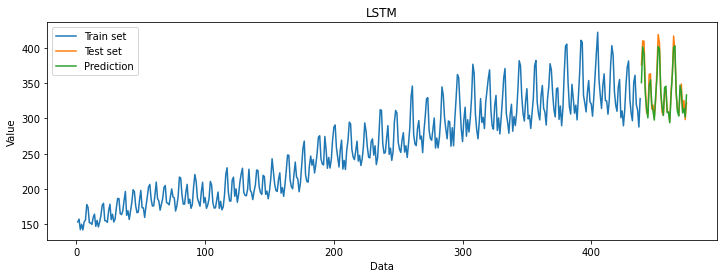

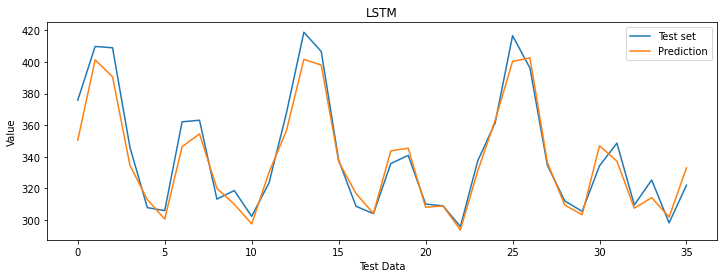

In [ ]:
# Plotting prediction results

plt.figure(1)
plt.plot(np.arange(1,439),dataY_plot[:438],label="Train set")
plt.plot(np.arange(439,475),dataY_plot[438:],label="Test set")
plt.plot(np.arange(439,475),data_predict[438:],label="Prediction")
plt.title('LSTM')
plt.xlabel('Data')
plt.ylabel('Value')
plt.legend()

plt.figure(2)
plt.plot(dataY_plot[438:],label="Test set")
plt.plot(data_predict[438:],label="Prediction")
plt.title('LSTM')
plt.xlabel('Test Data')
plt.ylabel('Value')
plt.legend()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print('Test Score: ', r2_score(testY.detach().numpy(), train_predict[438:].detach().numpy()))
print('Train Score: ', r2_score(trainY.detach().numpy(), train_predict[:438].detach().numpy()))


Test Score:  0.9329659628721699
Train Score:  0.9842861432965588


**2. MLP**

In [ ]:
# Implementing LSTM 

class MLP(nn.Module):
    
    def __init__(self, input_size,hidden1_size,hidden2_size):
        super(MLP, self).__init__()
        
        self.hidden1 = Linear(input_size,hidden1_size)
        xavier_uniform_(self.hidden1.weight)
        #nn.init.kaiming_normal_(self.hidden1.weight)

        self.hidden2 = Linear(hidden1_size, hidden2_size)
        xavier_uniform_(self.hidden2.weight)
        #nn.init.kaiming_normal_(self.hidden2.weight)

        self.output = Linear(hidden2_size, 1)
        xavier_uniform_(self.output.weight)
        #nn.init.kaiming_normal_(self.output.weight)
    
    def forward(self, X):
        out1=self.hidden1(X)
        out1=out1.view(-1,hidden1_size)
        out1=torch.relu(out1)
        out2=self.hidden2(out1)
        out2=out1.view(-1,hidden2_size)
        out2=torch.relu(out2)
        out3=self.output(out2)
             

        return out3   

In [ ]:
# Defining required parameters for training

learning_rate=0.025  
input_size=1
hidden1_size=11
hidden2_size=121
n_epochs=3000  

In [ ]:
# Implementing MLP model

model=MLP(input_size, hidden1_size, hidden2_size)

In [ ]:
# Implementing loss and optimizer

criterion=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate) 

In [ ]:
# Training loop

for epoch in range(n_epochs):
    #forward pass
    y_predicted=model(trainX)
    #loss
    loss=criterion(y_predicted,trainY)
    #backward pass
    loss.backward()
    #update
    optimizer.step()
    
    optimizer.zero_grad()
    
    if (epoch+1)%200==0:
        print(f"epoch:{epoch+1},loss:{loss.item():.6f}")

epoch:200,loss:0.003009
epoch:400,loss:0.002320
epoch:600,loss:0.002033
epoch:800,loss:0.001907
epoch:1000,loss:0.001848
epoch:1200,loss:0.001807
epoch:1400,loss:0.001768
epoch:1600,loss:0.001730
epoch:1800,loss:0.001696
epoch:2000,loss:0.001670
epoch:2200,loss:0.001649
epoch:2400,loss:0.001635
epoch:2600,loss:0.001625
epoch:2800,loss:0.001618
epoch:3000,loss:0.001612


In [ ]:
# Model evaluation

model.eval()
train_predict = model(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

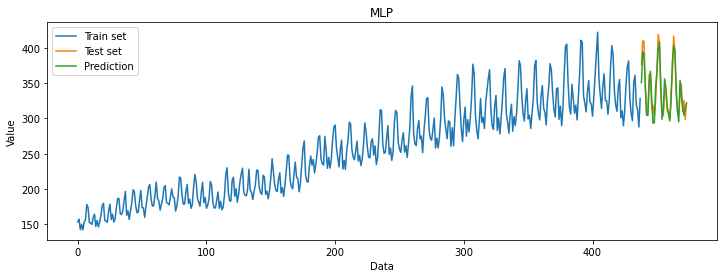

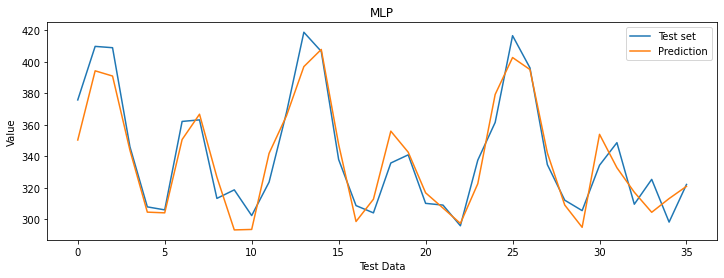

In [ ]:
# Plotting prediction results

plt.figure(1)
plt.plot(dataY_plot[:438],label="Train set")
plt.plot(np.arange(438,474),dataY_plot[438:],label="Test set")
plt.plot(np.arange(438,474),data_predict[438:],label="Prediction")
plt.title('MLP')
plt.xlabel('Data')
plt.ylabel('Value')
plt.legend()

plt.figure(2)
plt.plot(dataY_plot[438:],label="Test set")
plt.plot(data_predict[438:],label="Prediction")
plt.title('MLP')
plt.xlabel('Test Data')
plt.ylabel('Value')
plt.legend()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print('Test Score: ', r2_score(testY.detach().numpy(), train_predict[438:].detach().numpy()))
print('Train Score: ', r2_score(trainY.detach().numpy(), train_predict[:438].detach().numpy()))


Test Score:  0.8762921097136396
Train Score:  0.9700005611675642
